In [94]:
import numpy as np
import matplotlib.pyplot as plt
import re
import os

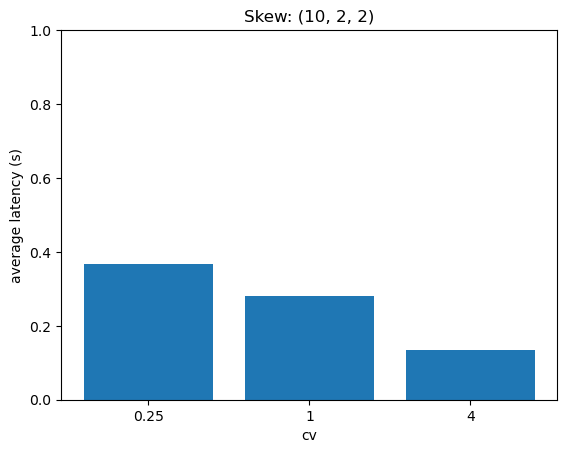

In [95]:
# log_dir = "logs/opt13"
cv_s=[0.25,1,4]

rows=[str(i) for i in cv_s]
cols=[0.3663,
0.2803,
0.1356,
]
tab = plt.bar(rows,cols)
plt.title("Skew: (10, 2, 2)")
plt.xlabel("cv")
plt.ylabel("average latency (s)")
# plt.xticks(cv_s,cv_s)
plt.ylim((0,1))
plt.show()


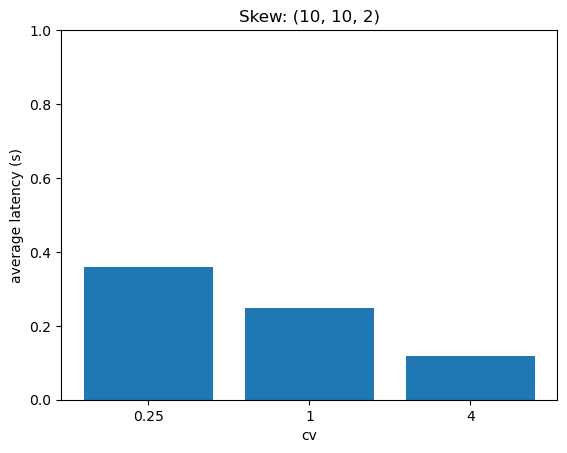

In [96]:
# log_dir = "logs/opt13"
cv_s=[0.25,1,4]

rows=[str(i) for i in cv_s]
cols=[0.3582,
0.2486,
0.1183,
]

tab = plt.bar(rows,cols)
plt.title("Skew: (10, 10, 2)")
plt.xlabel("cv")
plt.ylabel("average latency (s)")
# plt.xticks(cv_s,cv_s)
plt.ylim((0,1))
plt.show()


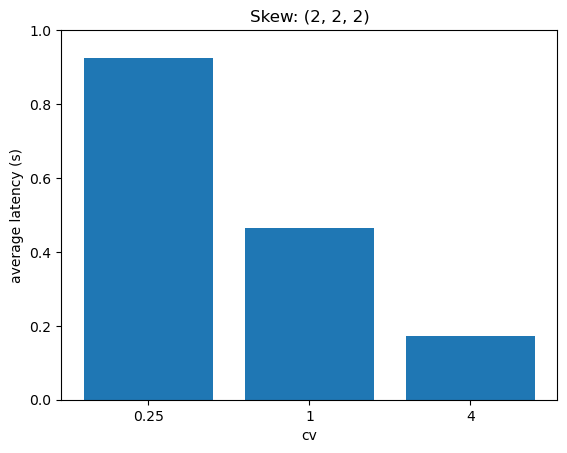

In [97]:
# log_dir = "logs/opt13"
cv_s=[0.25,1,4]

rows=[str(i) for i in cv_s]
cols=[0.9245,0.4655,0.1732]
tab = plt.bar(rows,cols)
plt.title("Skew: (2, 2, 2)")
plt.xlabel("cv")
plt.ylabel("average latency (s)")
# plt.xticks(cv_s,cv_s)
plt.ylim((0,1))
plt.show()


In [98]:
def get_latency(filename: str):
    req_times={}
    res_times={}
    with open(filename, 'r') as file:
        for line in file:
            if 'req' in line:
                match = re.search(r'server req (\d+) time: (\d+\.\d+)', line)
                try:
                    req_id = match.group(1)
                    req_time = match.group(2)
                    req_times[int(req_id)]=float(req_time)
                except: pass

            elif 'response' in line:
                match = re.search(r'server response (\d+) time: (\d+\.\d+)', line)
                try:
                    res_id = match.group(1)
                    res_time = match.group(2)
                    res_times[int(res_id)]=float(res_time)
                except: pass

    latency=[]
    for key,val in req_times.items():
        latency.append(res_times[key]-req_times[key])
    return latency

def get_cdf(latency):
    data=latency
    x = np.sort(data)
    y = 1. * np.arange(len(data)) / (len(data) - 1)

    # x=np.append([0],x)
    # y=np.append([0],y)

    return (x,y)


In [99]:
# fix, axs = plt.subplots(3)

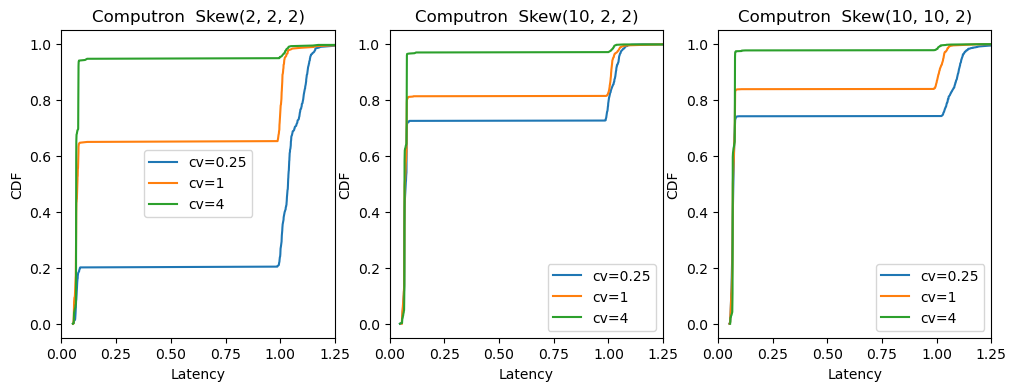

In [101]:
log_dir = "logs/opt13"

fig = plt.figure(figsize=(12, 4))
plt.subplot(1,3,1)

latency=get_latency(os.path.join(log_dir,"cv0.25/gamma_2_2_2.log"))
x,y=get_cdf(latency)

plt.plot(x, y, label="cv=0.25")
# print(latency)



latency=get_latency(os.path.join(log_dir,"cv1/gamma_2_2_2.log"))
x,y=get_cdf(latency)
plt.plot(x, y, label="cv=1")

latency=get_latency(os.path.join(log_dir,"cv4/gamma_2_2_2.log"))
x,y=get_cdf(latency)
plt.plot(x, y, label="cv=4")

plt.xlabel('Latency')
plt.ylabel('CDF')
plt.title("Computron  Skew(2, 2, 2)")
plt.legend()
plt.xlim((0,1.25))








log_dir = "logs/opt13"

plt.subplot(1,3,2)

latency=get_latency(os.path.join(log_dir,"cv0.25/gamma_10_2_2.log"))
x,y=get_cdf(latency)
plt.plot(x, y, label="cv=0.25")
# print(latency)



latency=get_latency(os.path.join(log_dir,"cv1/gamma_10_2_2.log"))
x,y=get_cdf(latency)
plt.plot(x, y, label="cv=1")

latency=get_latency(os.path.join(log_dir,"cv4/gamma_10_2_2.log"))
x,y=get_cdf(latency)
plt.plot(x, y, label="cv=4")

plt.xlabel('Latency')
plt.ylabel('CDF')
plt.title("Computron  Skew(10, 2, 2)")
plt.legend()
plt.xlim((0,1.25))






log_dir = "logs/opt13"

plt.subplot(1,3,3)

latency=get_latency(os.path.join(log_dir,"cv0.25/gamma_10_10_2.log"))
x,y=get_cdf(latency)
plt.plot(x, y, label="cv=0.25")
# print(latency)



latency=get_latency(os.path.join(log_dir,"cv1/gamma_10_10_2.log"))
x,y=get_cdf(latency)
plt.plot(x, y, label="cv=1")

latency=get_latency(os.path.join(log_dir,"cv4/gamma_10_10_2.log"))
x,y=get_cdf(latency)
plt.plot(x, y, label="cv=4")

plt.xlabel('Latency')
plt.ylabel('CDF')
plt.title("Computron  Skew(10, 10, 2)")
plt.legend()
plt.xlim((0,1.25))

plt.show()
